## Importacion de bibliotecas necesarias

In [116]:
##Manejo y mani
import pandas as pd 
pd.set_option("display.max_columns",30)
pd.set_option("display.max_rows",1500)
import matplotlib.pyplot as plt 
import cufflinks as cf 
cf.go_offline()
import numpy as np

##Imputacion
from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp
import seaborn as sns

Carga del conjunto de datos

In [117]:
df = pd.read_csv("./datasets/titanic.csv")

## Limpieza de datos

Mostrar el tamaño total del conjunto de datos

In [118]:
df.shape

(1310, 14)

Funcion para mostrar el porcentaje de nulos

In [119]:
def completitud_datos_nulos(df):
    return df.isnull().sum().sort_values(ascending=False) / df.shape[0]

Funcion para mostrar la cantidad de nulos

In [120]:
def Numero_completitud_datos_nulos(df):
    return df.isnull().sum().sort_values(ascending=False)

Muestra del porcentaje de nulos

In [121]:
completitud_datos_nulos(df)

body         0.907634
cabin        0.774809
boat         0.629008
home.dest    0.431298
age          0.201527
embarked     0.002290
fare         0.001527
sibsp        0.000763
name         0.000763
survived     0.000763
pclass       0.000763
sex          0.000763
parch        0.000763
ticket       0.000763
dtype: float64

Muestra del numero de nulos

In [122]:
Numero_completitud_datos_nulos(df)

body         1189
cabin        1015
boat          824
home.dest     565
age           264
embarked        3
fare            2
sibsp           1
name            1
survived        1
pclass          1
sex             1
parch           1
ticket          1
dtype: int64

Eliminar las filas que no tienen un porcentaje significativo de nulos

In [123]:
df = df[(~df["survived"].isnull()) & 
         ~df["pclass"].isnull() & 
         ~df["fare"].isnull() & 
         ~df["embarked"].isnull() & 
         ~df["ticket"].isnull() &
         ~df["parch"].isnull() &
         ~df["sex"].isnull() &
         ~df["name"].isnull() &
         ~df["sibsp"].isnull()
         ]

In [124]:
Numero_completitud_datos_nulos(df)

body         1186
cabin        1013
boat          822
home.dest     562
age           263
pclass          0
sibsp           0
sex             0
name            0
survived        0
fare            0
ticket          0
parch           0
embarked        0
dtype: int64

Imputacion de datos a las variables 'body' y 'age'

Imputacion para body

In [125]:
def complete_continuous_variablesMedian(df,col,strategy='median'):
    X = df[col].copy()
    im = SimpleImputer(strategy=strategy)
    Xi = pd.DataFrame(im.fit_transform(X),columns=col)
    l_ks = []
    for v in col:
        l_ks.append([v,ks_2samp(X[v].dropna(),Xi[v]).statistic])
    ks = pd.DataFrame(l_ks,columns=['feat','ks'])
    #print(ks)
    print((ks.ks>=0.1).sum())
    df[col] = im.transform(df[col].copy())
    return df

In [126]:
complete_continuous_variablesMedian(df,["body"])

1


pclass  survived                                               name  \
0        1.0       1.0                      Allen, Miss. Elisabeth Walton   
1        1.0       1.0                     Allison, Master. Hudson Trevor   
2        1.0       0.0                       Allison, Miss. Helen Loraine   
3        1.0       0.0               Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5        1.0       1.0                                Anderson, Mr. Harry   
6        1.0       1.0                  Andrews, Miss. Kornelia Theodosia   
7        1.0       0.0                             Andrews, Mr. Thomas Jr   
8        1.0       1.0      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9        1.0       0.0                            Artagaveytia, Mr. Ramon   
10       1.0       0.0                             Astor, Col. John Jacob   
11       1.0       1.0  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
12       1.0       1.0                      Aubart, Mme. Leontine Pauline   
13       1.0       1.0                       Barber, Miss. Ellen "Nellie"   
14       1.0       1.0               Barkworth, Mr. Algernon Henry Wilson   
15       1.0       0.0                                Baumann, Mr. John D   
16       1.0       0.0                           Baxter, Mr. Quigg Edmond   
17       1.0       1.0    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
18       1.0       1.0                              Bazzani, Miss. Albina   
19       1.0       0.0                               Beattie, Mr. Thomson   
20       1.0       1.0                      Beckwith, Mr. Richard Leonard   
21       1.0       1.0   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
22       1.0       1.0                              Behr, Mr. Karl Howell   
23       1.0       1.0                              Bidois, Miss. Rosalie   
24       1.0       1.0                                  Bird, Miss. Ellen   
25       1.0       0.0                                Birnbaum, Mr. Jakob   
26       1.0       1.0                            Bishop, Mr. Dickinson H   
27       1.0       1.0            Bishop, Mrs. Dickinson H (Helen Walton)   
28       1.0       1.0                             Bissette, Miss. Amelia   
29       1.0       1.0          Bjornstrom-Steffansson, Mr. Mauritz Hakan   
30       1.0       0.0                       Blackwell, Mr. Stephen Weart   
31       1.0       1.0                                   Blank, Mr. Henry   
32       1.0       1.0                            Bonnell, Miss. Caroline   
33       1.0       1.0                           Bonnell, Miss. Elizabeth   
34       1.0       0.0                           Borebank, Mr. John James   
35       1.0       1.0                           Bowen, Miss. Grace Scott   
36       1.0       1.0                        Bowerman, Miss. Elsie Edith   
37       1.0       1.0      Bradley, Mr. George ("George Arthur Brayton")   
38       1.0       0.0                            Brady, Mr. John Bertram   
39       1.0       0.0                                 Brandeis, Mr. Emil   
40       1.0       0.0                          Brewe, Dr. Arthur Jackson   
41       1.0       1.0          Brown, Mrs. James Joseph (Margaret Tobin)   
42       1.0       1.0     Brown, Mrs. John Murray (Caroline Lane Lamson)   
43       1.0       1.0    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
44       1.0       1.0                    Burns, Miss. Elizabeth Margaret   
45       1.0       0.0                  Butt, Major. Archibald Willingham   
46       1.0       0.0                              Cairns, Mr. Alexander   
47       1.0       1.0                  Calderhead, Mr. Edward Pennington   
48       1.0       1.0   Candee, Mrs. Edward (Helen Churchill Hungerford)   
49       1.0       1.0                 Cardeza, Mr. Thomas Drake Martinez   
50       1.0       1.0  Cardeza, Mrs. James Warburton Martinez (Charlo...   
51

Imputacion para age

In [127]:
def complete_continuous_variablesMean(df,col,strategy='mean'):
    X = df[col].copy()
    im = SimpleImputer(strategy=strategy)
    Xi = pd.DataFrame(im.fit_transform(X),columns=col)
    l_ks = []
    for v in col:
        l_ks.append([v,ks_2samp(X[v].dropna(),Xi[v]).statistic])
    ks = pd.DataFrame(l_ks,columns=['feat','ks'])
    #print(ks)
    print((ks.ks>=0.1).sum())
    df[col] = im.transform(df[col].copy())
    return df

In [128]:
complete_continuous_variablesMean(df,["age"])

1


pclass  survived                                               name  \
0        1.0       1.0                      Allen, Miss. Elisabeth Walton   
1        1.0       1.0                     Allison, Master. Hudson Trevor   
2        1.0       0.0                       Allison, Miss. Helen Loraine   
3        1.0       0.0               Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5        1.0       1.0                                Anderson, Mr. Harry   
6        1.0       1.0                  Andrews, Miss. Kornelia Theodosia   
7        1.0       0.0                             Andrews, Mr. Thomas Jr   
8        1.0       1.0      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9        1.0       0.0                            Artagaveytia, Mr. Ramon   
10       1.0       0.0                             Astor, Col. John Jacob   
11       1.0       1.0  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
12       1.0       1.0                      Aubart, Mme. Leontine Pauline   
13       1.0       1.0                       Barber, Miss. Ellen "Nellie"   
14       1.0       1.0               Barkworth, Mr. Algernon Henry Wilson   
15       1.0       0.0                                Baumann, Mr. John D   
16       1.0       0.0                           Baxter, Mr. Quigg Edmond   
17       1.0       1.0    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
18       1.0       1.0                              Bazzani, Miss. Albina   
19       1.0       0.0                               Beattie, Mr. Thomson   
20       1.0       1.0                      Beckwith, Mr. Richard Leonard   
21       1.0       1.0   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
22       1.0       1.0                              Behr, Mr. Karl Howell   
23       1.0       1.0                              Bidois, Miss. Rosalie   
24       1.0       1.0                                  Bird, Miss. Ellen   
25       1.0       0.0                                Birnbaum, Mr. Jakob   
26       1.0       1.0                            Bishop, Mr. Dickinson H   
27       1.0       1.0            Bishop, Mrs. Dickinson H (Helen Walton)   
28       1.0       1.0                             Bissette, Miss. Amelia   
29       1.0       1.0          Bjornstrom-Steffansson, Mr. Mauritz Hakan   
30       1.0       0.0                       Blackwell, Mr. Stephen Weart   
31       1.0       1.0                                   Blank, Mr. Henry   
32       1.0       1.0                            Bonnell, Miss. Caroline   
33       1.0       1.0                           Bonnell, Miss. Elizabeth   
34       1.0       0.0                           Borebank, Mr. John James   
35       1.0       1.0                           Bowen, Miss. Grace Scott   
36       1.0       1.0                        Bowerman, Miss. Elsie Edith   
37       1.0       1.0      Bradley, Mr. George ("George Arthur Brayton")   
38       1.0       0.0                            Brady, Mr. John Bertram   
39       1.0       0.0                                 Brandeis, Mr. Emil   
40       1.0       0.0                          Brewe, Dr. Arthur Jackson   
41       1.0       1.0          Brown, Mrs. James Joseph (Margaret Tobin)   
42       1.0       1.0     Brown, Mrs. John Murray (Caroline Lane Lamson)   
43       1.0       1.0    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
44       1.0       1.0                    Burns, Miss. Elizabeth Margaret   
45       1.0       0.0                  Butt, Major. Archibald Willingham   
46       1.0       0.0                              Cairns, Mr. Alexander   
47       1.0       1.0                  Calderhead, Mr. Edward Pennington   
48       1.0       1.0   Candee, Mrs. Edward (Helen Churchill Hungerford)   
49       1.0       1.0                 Cardeza, Mr. Thomas Drake Martinez   
50       1.0       1.0  Cardeza, Mrs. James Warburton Martinez (Charlo...   
51

Eliminar la variable cabin por la mayor cantidad de nulos y un tratamiento anterior dejaba mucho sesgo

In [129]:
df.drop(columns=["cabin"],inplace=True)


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1306 non-null   float64
 1   survived   1306 non-null   float64
 2   name       1306 non-null   object 
 3   sex        1306 non-null   object 
 4   age        1306 non-null   float64
 5   sibsp      1306 non-null   float64
 6   parch      1306 non-null   float64
 7   ticket     1306 non-null   object 
 8   fare       1306 non-null   float64
 9   embarked   1306 non-null   object 
 10  boat       484 non-null    object 
 11  body       1306 non-null   float64
 12  home.dest  744 non-null    object 
dtypes: float64(7), object(6)
memory usage: 142.8+ KB


## Preparacion de datos

Mostrar las graficas de las variables categoricas para su respectivo analisis.

In [131]:
def graficas_descriptivas(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, palette="Set2")
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)  # Rotar etiquetas si son largas
        plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18680\2114508743.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




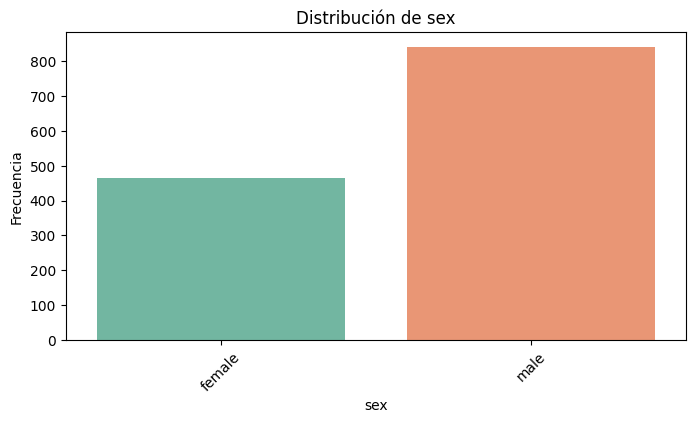

C:\Users\DELL\AppData\Local\Temp\ipykernel_18680\2114508743.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




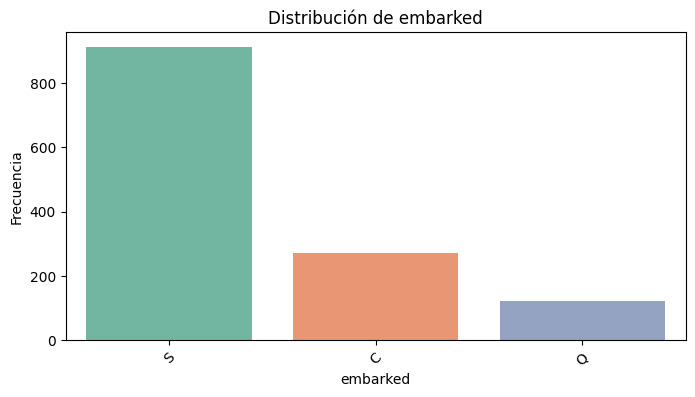

C:\Users\DELL\AppData\Local\Temp\ipykernel_18680\2114508743.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




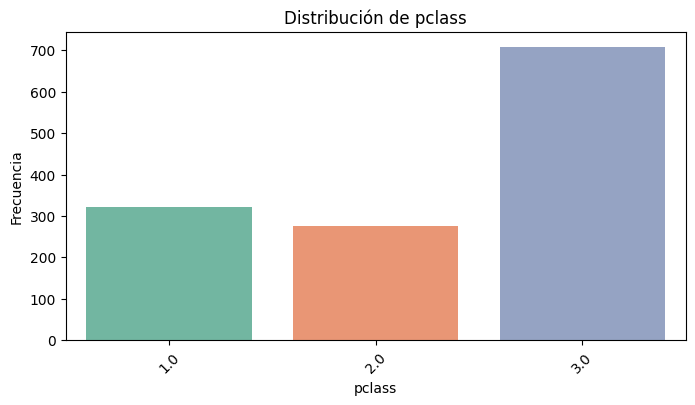

C:\Users\DELL\AppData\Local\Temp\ipykernel_18680\2114508743.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




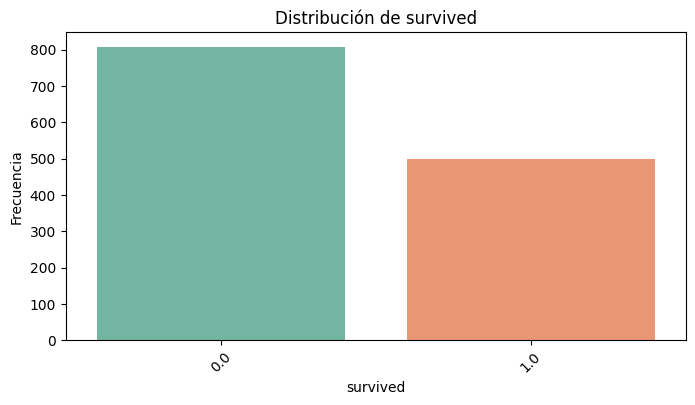

C:\Users\DELL\AppData\Local\Temp\ipykernel_18680\2114508743.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




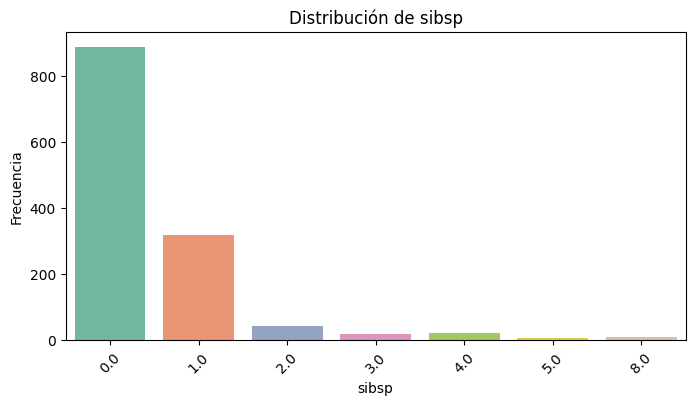

C:\Users\DELL\AppData\Local\Temp\ipykernel_18680\2114508743.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




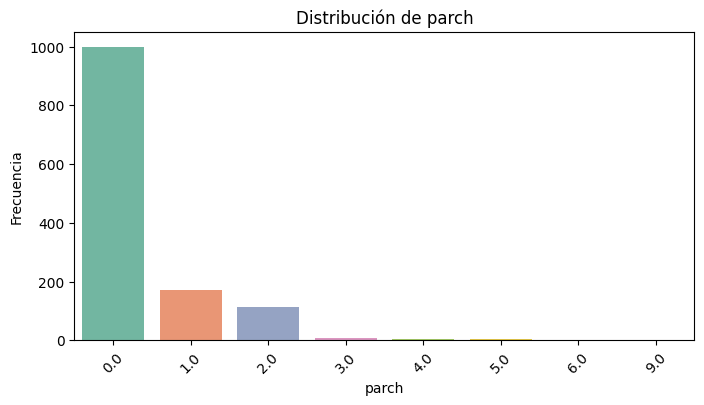

C:\Users\DELL\AppData\Local\Temp\ipykernel_18680\2114508743.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




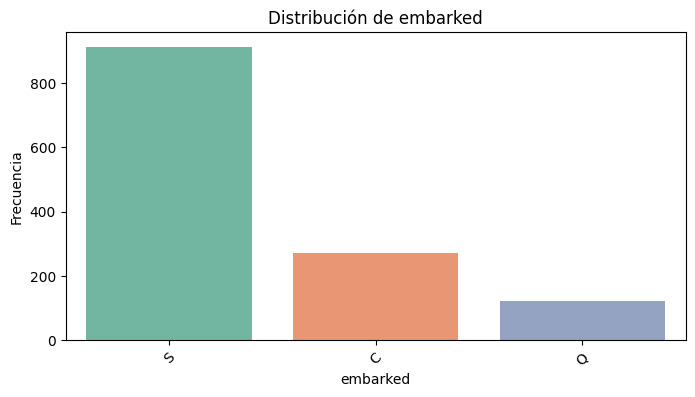

C:\Users\DELL\AppData\Local\Temp\ipykernel_18680\2114508743.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




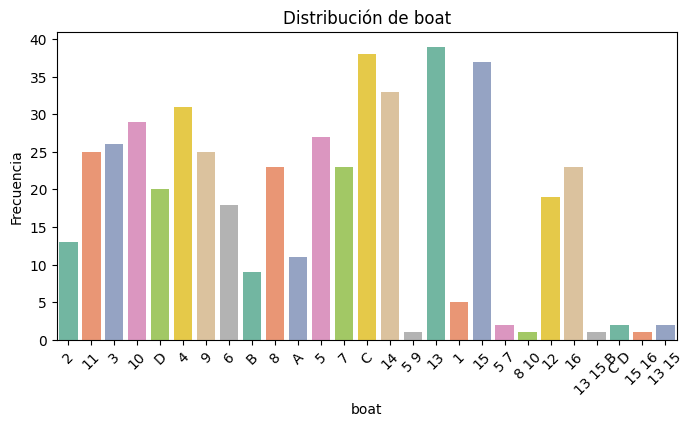

In [132]:
graficas_descriptivas(df,["sex","embarked","pclass","survived","sibsp","parch","embarked","boat"])


Mostrar las graficas de las variables numericas para su respectivo analisis.

In [133]:
def graficas_numericas(df, columns):
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        sns.histplot(df[col], bins=20, kde=True, ax=axes[0], color="blue")
        axes[0].set_title(f"Histograma de {col}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frecuencia")

        sns.boxplot(x=df[col], ax=axes[1], color="red")
        axes[1].set_title(f"Boxplot de {col}")
        axes[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()    

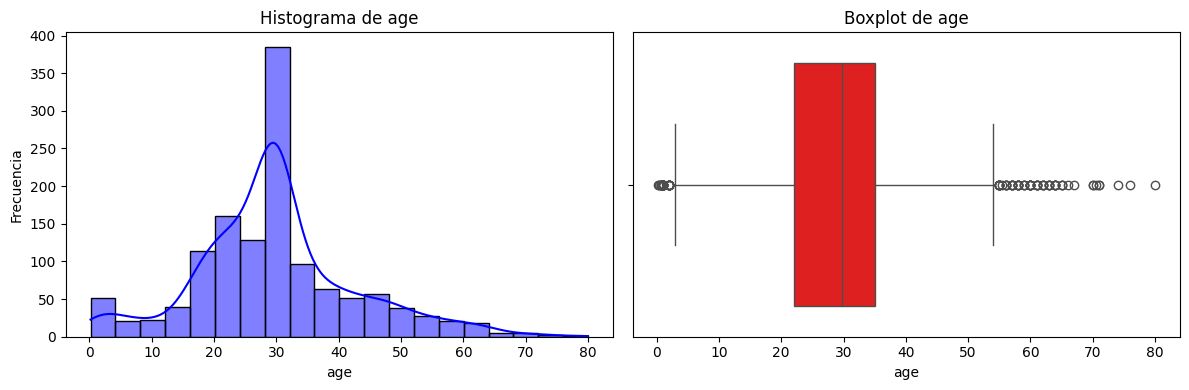

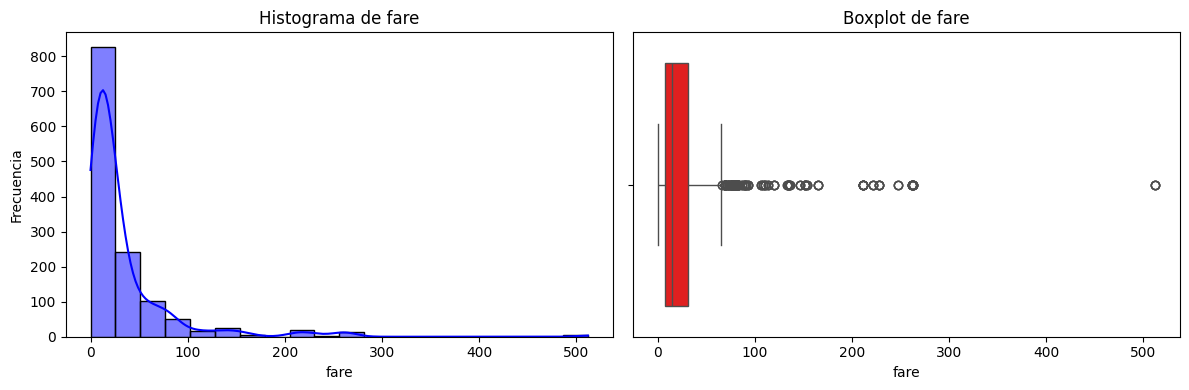

In [134]:
graficas_numericas(df,["age","fare"])


Transformación de la variable 'age', en donde se toma el rango de (0,27], (27, 65] y (65, inf) para su asignación a primera, segunda y tercera edad respectivamente.

In [135]:
df["age_category"]=pd.cut(df["age"], bins=[0,27,65,float("inf")],labels=["1","2","3"])
df["age_category"]=df["age_category"].astype(str)


In [136]:
df

pclass  survived                                               name  \
0        1.0       1.0                      Allen, Miss. Elisabeth Walton   
1        1.0       1.0                     Allison, Master. Hudson Trevor   
2        1.0       0.0                       Allison, Miss. Helen Loraine   
3        1.0       0.0               Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5        1.0       1.0                                Anderson, Mr. Harry   
6        1.0       1.0                  Andrews, Miss. Kornelia Theodosia   
7        1.0       0.0                             Andrews, Mr. Thomas Jr   
8        1.0       1.0      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9        1.0       0.0                            Artagaveytia, Mr. Ramon   
10       1.0       0.0                             Astor, Col. John Jacob   
11       1.0       1.0  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
12       1.0       1.0                      Aubart, Mme. Leontine Pauline   
13       1.0       1.0                       Barber, Miss. Ellen "Nellie"   
14       1.0       1.0               Barkworth, Mr. Algernon Henry Wilson   
15       1.0       0.0                                Baumann, Mr. John D   
16       1.0       0.0                           Baxter, Mr. Quigg Edmond   
17       1.0       1.0    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
18       1.0       1.0                              Bazzani, Miss. Albina   
19       1.0       0.0                               Beattie, Mr. Thomson   
20       1.0       1.0                      Beckwith, Mr. Richard Leonard   
21       1.0       1.0   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
22       1.0       1.0                              Behr, Mr. Karl Howell   
23       1.0       1.0                              Bidois, Miss. Rosalie   
24       1.0       1.0                                  Bird, Miss. Ellen   
25       1.0       0.0                                Birnbaum, Mr. Jakob   
26       1.0       1.0                            Bishop, Mr. Dickinson H   
27       1.0       1.0            Bishop, Mrs. Dickinson H (Helen Walton)   
28       1.0       1.0                             Bissette, Miss. Amelia   
29       1.0       1.0          Bjornstrom-Steffansson, Mr. Mauritz Hakan   
30       1.0       0.0                       Blackwell, Mr. Stephen Weart   
31       1.0       1.0                                   Blank, Mr. Henry   
32       1.0       1.0                            Bonnell, Miss. Caroline   
33       1.0       1.0                           Bonnell, Miss. Elizabeth   
34       1.0       0.0                           Borebank, Mr. John James   
35       1.0       1.0                           Bowen, Miss. Grace Scott   
36       1.0       1.0                        Bowerman, Miss. Elsie Edith   
37       1.0       1.0      Bradley, Mr. George ("George Arthur Brayton")   
38       1.0       0.0                            Brady, Mr. John Bertram   
39       1.0       0.0                                 Brandeis, Mr. Emil   
40       1.0       0.0                          Brewe, Dr. Arthur Jackson   
41       1.0       1.0          Brown, Mrs. James Joseph (Margaret Tobin)   
42       1.0       1.0     Brown, Mrs. John Murray (Caroline Lane Lamson)   
43       1.0       1.0    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
44       1.0       1.0                    Burns, Miss. Elizabeth Margaret   
45       1.0       0.0                  Butt, Major. Archibald Willingham   
46       1.0       0.0                              Cairns, Mr. Alexander   
47       1.0       1.0                  Calderhead, Mr. Edward Pennington   
48       1.0       1.0   Candee, Mrs. Edward (Helen Churchill Hungerford)   
49       1.0       1.0                 Cardeza, Mr. Thomas Drake Martinez   
50       1.0       1.0  Cardeza, Mrs. James Warburton Martinez (Charlo...   
51

Calcular todos los valores de la variable categorica boat para deducir si es buena idea inclirla dentro del modelo.

In [137]:
frecuencia = df["boat"].value_counts()
print("Frecuencia Absoluta:\n", frecuencia)

Frecuencia Absoluta:
 boat
13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
9          25
11         25
8          23
16         23
7          23
D          20
12         19
6          18
2          13
A          11
B           9
1           5
13 15       2
5 7         2
C D         2
5 9         1
8 10        1
13 15 B     1
15 16       1
Name: count, dtype: int64


A la variable 'boat', si hay un NaN, se supondra que no alcanzo un bote el pasajero y se le asignara un 0

In [138]:
X=df.copy()
X["familySize"]=X["sibsp"] + X["parch"] + 1
X["isAlone"]=np.where(X["familySize"]==1,1,0)

Borramos las variables que no son significativas para el modelo

In [139]:
X.drop(columns=["name","sibsp","parch","ticket","embarked","home.dest","age","boat"],inplace=True)
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        1306 non-null   float64
 1   survived      1306 non-null   float64
 2   sex           1306 non-null   object 
 3   fare          1306 non-null   float64
 4   body          1306 non-null   float64
 5   age_category  1306 non-null   object 
 6   familySize    1306 non-null   float64
 7   isAlone       1306 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 91.8+ KB


Convertimos a la variable 'sex' en dummy 

In [140]:
dummy=pd.get_dummies(X['sex'])
X=pd.concat([X, dummy],axis=1)
X.drop('sex',axis=1)

pclass  survived      fare   body age_category  familySize  isAlone  \
0        1.0       1.0  211.3375  154.0            2         1.0        1   
1        1.0       1.0  151.5500  154.0            1         4.0        0   
2        1.0       0.0  151.5500  154.0            1         4.0        0   
3        1.0       0.0  151.5500  135.0            2         4.0        0   
4        1.0       0.0  151.5500  154.0            1         4.0        0   
5        1.0       1.0   26.5500  154.0            2         1.0        1   
6        1.0       1.0   77.9583  154.0            2         2.0        0   
7        1.0       0.0    0.0000  154.0            2         1.0        1   
8        1.0       1.0   51.4792  154.0            2         3.0        0   
9        1.0       0.0   49.5042   22.0            3         1.0        1   
10       1.0       0.0  227.5250  124.0            2         2.0        0   
11       1.0       1.0  227.5250  154.0            1         2.0        0   
12       1.0       1.0   69.3000  154.0            1         1.0        1   
13       1.0       1.0   78.8500  154.0            1         1.0        1   
14       1.0       1.0   30.0000  154.0            3         1.0        1   
15       1.0       0.0   25.9250  154.0            2         1.0        1   
16       1.0       0.0  247.5208  154.0            1         2.0        0   
17       1.0       1.0  247.5208  154.0            2         2.0        0   
18       1.0       1.0   76.2917  154.0            2         1.0        1   
19       1.0       0.0   75.2417  154.0            2         1.0        1   
20       1.0       1.0   52.5542  154.0            2         3.0        0   
21       1.0       1.0   52.5542  154.0            2         3.0        0   
22       1.0       1.0   30.0000  154.0            1         1.0        1   
23       1.0       1.0  227.5250  154.0            2         1.0        1   
24       1.0       1.0  221.7792  154.0            2         1.0        1   
25       1.0       0.0   26.0000  148.0            1         1.0        1   
26       1.0       1.0   91.0792  154.0            1         2.0        0   
27       1.0       1.0   91.0792  154.0            1         2.0        0   
28       1.0       1.0  135.6333  154.0            2         1.0        1   
29       1.0       1.0   26.5500  154.0            2         1.0        1   
30       1.0       0.0   35.5000  154.0            2         1.0        1   
31       1.0       1.0   31.0000  154.0            2         1.0        1   
32       1.0       1.0  164.8667  154.0            2         1.0        1   
33       1.0       1.0   26.5500  154.0            2         1.0        1   
34       1.0       0.0   26.5500  154.0            2         1.0        1   
35       1.0       1.0  262.3750  154.0            2         1.0        1   
36       1.0       1.0   55.0000  154.0            1         2.0        0   
37       1.0       1.0   26.5500  154.0            2         1.0        1   
38       1.0       0.0   30.5000  154.0            2         1.0        1   
39       1.0       0.0   50.4958  208.0            2         1.0        1   
40       1.0       0.0   39.6000  154.0            2         1.0        1   
41       1.0       1.0   27.7208  154.0            2         1.0        1   
42       1.0       1.0   51.4792  154.0            2         3.0        0   
43       1.0       1.0   76.2917  154.0            2         1.0        1   
44       1.0       1.0  134.5000  154.0            2         1.0        1   
45       1.0       0.0   26.5500  154.0            2         1.0        1   
46       1.0       0.0   31.0000  154.0            2         1.0        1   
47       1.0       1.0   26.2875  154.0            2         1.0        1   
48       1.0       1.0   27.4458  154.0            2         1.0        1   
49       1.0       1.0  512.3292  154.0            2         2.0        0   
50       1.0       1.0  512.3292  154.0            2         2.0        0   
51

In [141]:
varc = list(X.describe())

In [142]:
varc = [x for x in varc if x not in 'survived']

In [143]:
vard = [x for x in X if x not in 'survived']

In [144]:
target='survived'

In [145]:
X[target].value_counts()

survived
0.0    808
1.0    498
Name: count, dtype: int64

## Modelos de clasificacion

Modulos necesarios para diferentes modelos de ML

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

Guardamos todas las variables continuas, como categoricas dentro de un nuevo dataset y borramos la variable 'sex'.

In [147]:
Xdefinitiva=X[varc].copy()
Xdefinitiva[vard]=X[vard].copy()
Xdefinitiva=Xdefinitiva.drop('sex',axis=1)

Guardamos en otra variable los valores de la variable objetivo.

In [148]:
y=X[target].copy()

Escalamos las variables 'fare' y 'body' dentro del dataset para un mejor uso y optimización dentro de cada modelo.

In [149]:
X_definitiva_seleccionado = Xdefinitiva[['fare', 'body']]
sc = MinMaxScaler()
Xs = pd.DataFrame(sc.fit_transform(X_definitiva_seleccionado), columns=['fare', 'body'])

Xdefinitiva.update(Xs)

Renombramos el nombre resultante al usar la funcion de pandas que convierte a variables dummy.

In [150]:
Xdefinitiva.columns = Xdefinitiva.columns.astype(str)
Xdefinitiva = Xdefinitiva.rename(columns={"1.0": "Primera", "2.0": "Segunda", "3.0": "Tercera"})


In [153]:
y=y.astype(int)

Balanceo manual del modelo para un mejor entrenamiento.

In [154]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

undersampler = RandomUnderSampler(sampling_strategy='auto')
Xdefinitiva, y = undersampler.fit_resample(Xdefinitiva, y)

In [155]:
Xt, Xv, yt, yv = train_test_split(Xdefinitiva, y, train_size=0.7)

Funciones de entrenamiento y muestra del accuracy

In [156]:
def entrenar(param, modelo, X,y):
    grid = RandomizedSearchCV(param_distributions=param,
                             n_jobs=-1,
                             n_iter=20,
                             cv=15,
                             estimator=modelo,
                             error_score='raise')
    grid.fit(X,y)
    return grid, grid.best_estimator_, grid.best_score_, grid.best_params_

In [157]:
def metricas(Xt, Xv, yt, yv, modelo):
    d = {'train':round(roc_auc_score(y_true=yt, y_score=modelo.predict_proba(Xt)[:,1]),10),
         'validate':round(roc_auc_score(y_true=yv, y_score=modelo.predict_proba(Xv)[:,1]),10)
        }
    return d

## Construcción de modelos de clasificación

Red Neuronal

In [158]:
param_mlpc = dict(hidden_layer_sizes = [(a,b,c,) for a in range(len(varc), len(varc)*2) for b in range(len(varc), len(varc)*2) for c in range(len(varc), len(varc)*2)],
             activation = ['identity', 'logistic', 'tanh', 'relu'],
             solver = ['lbfgs', 'sgd', 'adam'],
             alpha = np.arange(0.00001, 0.001, 0.00001),
             learning_rate = ['constant', 'invscaling', 'adaptive'])

In [159]:
modelo_mlpc = MLPClassifier()
modelo_mlpc, best_estimator_mlpc, score_mlpc, params_mlpc = entrenar(param_mlpc, modelo_mlpc, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo_mlpc)

{'train': np.float64(0.8283735228), 'validate': np.float64(0.8573516187)}

Random Forest

In [160]:
param = dict(n_estimators = range(2,10),
             max_depeth = range(2,10),
             max_features = range(2,len(varc)),
             criterion = ['gini', 'entropy'])

In [161]:
param = dict(n_estimators=list(range(1, 200, 10)),
                                    criterion=['gini', 'entropy'],
                                    max_depth=[x for x in list(range(2, 5))] + [None],
                                    min_samples_split=[x for x in list(range(2, 5))],
                                    min_samples_leaf=[x for x in list(range(2, 5))],
                                    max_features=[None] + [i * .05 for i in list(range(2, 5))],
                                    max_leaf_nodes=list(range(2, 10)) + [None],
                                    min_impurity_decrease=[x * .10 for x in list(range(2, 5))],
                                    oob_score=[True,False],
                                    warm_start=[True, False],
                                    class_weight=[None, 'balanced'],
                                    max_samples=[None],)

In [162]:
modelo = RandomForestClassifier()
modelo, best_estimator, score, params = entrenar(param, modelo, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo)

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning:

class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.



{'train': np.float64(0.7620362282), 'validate': np.float64(0.7815872302)}

Ada boost

In [163]:
param_adab = dict(n_estimators = range(2,15),
             learning_rate = np.arange(0.01,1,0.05),
             algorithm = ['SAMME'])

In [164]:
modelo_adab = AdaBoostClassifier()
modelo_adab, best_estimator_adab, score, params = entrenar(param_adab, modelo_adab, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo_adab)

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



{'train': np.float64(0.83173592), 'validate': np.float64(0.8533498201)}

Gradient boosting

In [ ]:
param_gradientB = dict(
    n_estimators=list(range(1, 200, 10)), 
    learning_rate=list(np.arange(0.001, 0.2, 0.05)),
    max_depth=list(range(2, 10, 1)),                
    min_samples_split=list(range(2, 10, 1)),      
    min_samples_leaf=list(range(2, 10, 1)),         
    subsample=list(np.arange(0.01, 1, 0.1))
)

In [168]:
modelo_gradientB = GradientBoostingClassifier()
modelo_gradientB, best_estimator_GB, score, params = entrenar(param_gradientB, modelo_gradientB, Xt, yt)
metricas(Xt,Xv,yt,yv,modelo_gradientB)

{'train': np.float64(0.9020413377), 'validate': np.float64(0.8683902878)}

Uso de Ensemble Learning para combinación de los 4 modelos hechos.

In [169]:
voting_classifier = VotingClassifier(estimators=[('mlpc', best_estimator_mlpc),
                ('rf', best_estimator),
                ('adab', best_estimator_adab),
                ('gradB', best_estimator_GB)],
    voting='soft'
)

In [170]:
voting_classifier.fit(Xt, yt)

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning:

class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be remov

VotingClassifier(estimators=[('mlpc',
                              MLPClassifier(activation='identity',
                                            alpha=np.float64(0.0009200000000000001),
                                            hidden_layer_sizes=(9, 9, 5))),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=3,
                                                     max_features=0.2,
                                                     max_leaf_nodes=5,
                                                     min_impurity_decrease=0.2,
                                                     min_samples_leaf=2,
                                                     min_samples_split=3,
                                                     n_estimators=141,
                                                     warm_start=True)),
                             ('adab',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 learning_rate=np.float64(0.91),
                                                 n_estimators=8)),
                             ('gradB',
                              GradientBoostingClassifier(learning_rate=np.float64(0.101),
                                                         min_samples_leaf=5,
                                                         min_samples_split=8,
                                                         n_estimators=81,
                                                         subsample=np.float64(0.6100000000000001)))],
                 voting='soft')

In [171]:
metricas(Xt, Xv, yt, yv, voting_classifier)

{'train': np.float64(0.8666949613), 'validate': np.float64(0.8649955036)}

In [172]:
import pickle

Guardar el modelo de red neuronal

In [173]:
filename = './modelo_red_neuronal.pkl'
with open(filename, 'wb') as file:
    pickle.dump(modelo_mlpc,file)
    
print(f'Modelo guardado en {filename}')

Modelo guardado en ./modelo_red_neuronal.pkl


Guardar el modelo de Random Forest

In [174]:
filename = './modelo_random_forest.pkl'
with open(filename, 'wb') as file:
    pickle.dump(modelo,file)
    
print(f'Modelo guardado en {filename}')

Modelo guardado en ./modelo_random_forest.pkl


Guardar el modelo de Ada Boost

In [175]:
filename = './modelo_ada_boost.pkl'
with open(filename, 'wb') as file:
    pickle.dump(modelo_adab,file)
    
print(f'Modelo guardado en {filename}')

Modelo guardado en ./modelo_ada_boost.pkl


Guardar el modelo de Gradient Boosting

In [178]:
filename = './modelo_gradientB.pkl'
with open(filename, 'wb') as file:
    pickle.dump(modelo_gradientB,file)
    
print(f'Modelo guardado en {filename}')

Modelo guardado en ./modelo_gradientB.pkl


Guardar el modelo Final

In [176]:
filename = './modelo_final.pkl'
with open(filename, 'wb') as file:
    pickle.dump(voting_classifier,file)
    
print(f'Modelo guardado en {filename}')

Modelo guardado en ./modelo_final.pkl


In [179]:
voting_classifier

VotingClassifier(estimators=[('mlpc',
                              MLPClassifier(activation='identity',
                                            alpha=np.float64(0.0009200000000000001),
                                            hidden_layer_sizes=(9, 9, 5))),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=3,
                                                     max_features=0.2,
                                                     max_leaf_nodes=5,
                                                     min_impurity_decrease=0.2,
                                                     min_samples_leaf=2,
                                                     min_samples_split=3,
                                                     n_estimators=141,
                                                     warm_start=True)),
                             ('adab',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 learning_rate=np.float64(0.91),
                                                 n_estimators=8)),
                             ('gradB',
                              GradientBoostingClassifier(learning_rate=np.float64(0.101),
                                                         min_samples_leaf=5,
                                                         min_samples_split=8,
                                                         n_estimators=81,
                                                         subsample=np.float64(0.6100000000000001)))],
                 voting='soft')